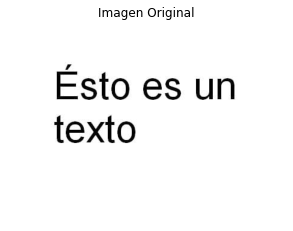

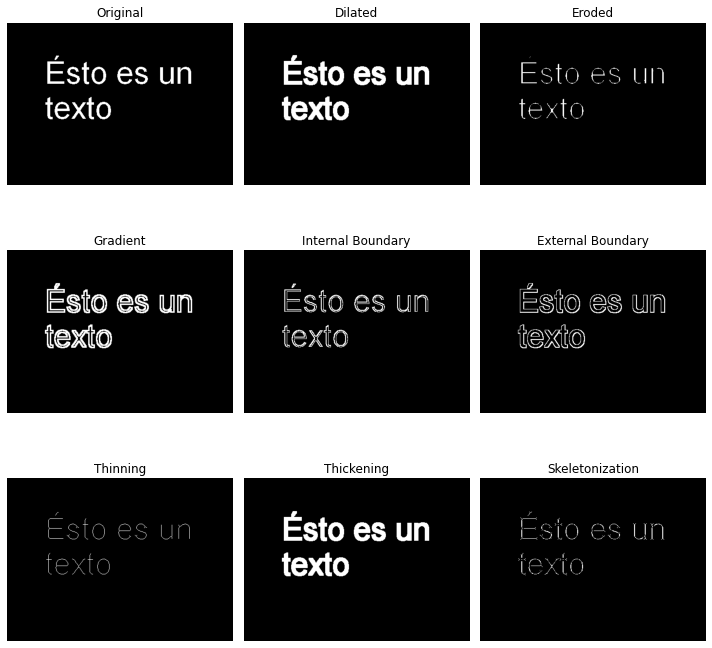

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import thin

# Cargar la imagen en escala de grises
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)


# Mostrar la imagen original
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")
plt.show()

# Convertir a imagen binaria (asegurar que el fondo sea negro y el texto blanco)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Definir el kernel más grande para mejorar la erosión
kernel = np.ones((4, 4), np.uint8)  # Aumentado de (3,3) a (5,5)

# Aplicar transformaciones morfológicas
dilated = cv2.dilate(binary, kernel, iterations=1)
eroded = cv2.erode(binary, kernel, iterations=1)  # Aquí debe funcionar correctamente


# Otras transformaciones
gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)
internal_boundary = cv2.subtract(binary, eroded)
external_boundary = cv2.subtract(dilated, binary)
thinning = thin(binary // 255) * 255
thickening = cv2.dilate(binary, kernel, iterations=1)

# Esqueletización rápida con OpenCV
binary_skel = binary.copy()
skel = np.zeros(binary_skel.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    eroded_temp = cv2.erode(binary_skel, element)
    temp = cv2.dilate(eroded_temp, element)
    temp = cv2.subtract(binary_skel, temp)
    skel = cv2.bitwise_or(skel, temp)
    binary_skel = eroded_temp.copy()
    if cv2.countNonZero(binary_skel) == 0:
        break

# Mostrar todas las imágenes en un solo gráfico
titles = ["Original", "Dilated", "Eroded", "Gradient", "Internal Boundary", 
          "External Boundary", "Thinning", "Thickening", "Skeletonization"]
images = [binary, dilated, eroded, gradient, internal_boundary, 
          external_boundary, thinning.astype(np.uint8), thickening, skel]

plt.figure(figsize=(10,10))
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
